# Question 1

Step 1: Import the necessary libraries

In [1]:
import pandas as pd


Step 2: Import the dataset from this address.

In [4]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')


Step 3: Assign it to a variable called users

In [3]:
users = pd.read_csv(url, sep='|')


Step 4: Discover what is the mean age per occupation

In [5]:
mean_age = users.groupby('occupation')['age'].mean()
print(mean_age)


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


Step 5: Discover the Male ratio per occupation and sort it from the most to the least

In [6]:
# create a function to get the male ratio
def male_ratio(x):
    if x['gender'] == 'M':
        return 1
    else:
        return 0

# apply the function to the dataframe to create a new column
users['male_ratio'] = users.apply(male_ratio, axis=1)

# calculate the male ratio per occupation
male_ratio = users.groupby('occupation')['male_ratio'].mean()

# sort the male ratio in descending order
male_ratio = male_ratio.sort_values(ascending=False)

print(male_ratio)


occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: male_ratio, dtype: float64


Step 6: For each occupation, calculate the minimum and maximum ages

In [7]:
# calculate the minimum and maximum ages per occupation
age_range = users.groupby('occupation')['age'].agg(['min', 'max'])

print(age_range)


               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


Step 7: For each combination of occupation and sex, calculate the mean age

In [8]:
mean_age_sex = users.groupby(['occupation', 'gender'])['age'].mean()

print(mean_age_sex)


occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

Step 8: For each occupation present the percentage of women and men

In [9]:
# create a function to get the gender percentage
def gender_percentage(x):
    if x['gender'] == 'M':
        return x['male_ratio']*100
    else:
        return (1-x['male_ratio'])*100

# apply the function to the dataframe to create two new columns
users['male_percentage'] = users.apply(gender_percentage, axis=1)
users['female_percentage'] = 100 - users['male_percentage']

# calculate the gender percentage per occupation
gender_percentage = users.groupby('occupation')[['male_percentage', 'female_percentage']].mean()

print(gender_percentage)


               male_percentage  female_percentage
occupation                                       
administrator            100.0                0.0
artist                   100.0                0.0
doctor                   100.0                0.0
educator                 100.0                0.0
engineer                 100.0                0.0
entertainment            100.0                0.0
executive                100.0                0.0
healthcare               100.0                0.0
homemaker                100.0                0.0
lawyer                   100.0                0.0
librarian                100.0                0.0
marketing                100.0                0.0
none                     100.0                0.0
other                    100.0                0.0
programmer               100.0                0.0
retired                  100.0                0.0
salesman                 100.0                0.0
scientist                100.0                0.0


# Question 2

In [70]:
import pandas as pd


In [74]:
import urllib.request
import io

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/euro2012.csv'

try:
    response = urllib.request.urlopen(url)
except urllib.error.HTTPError as e:
    print('HTTP error:', e.code)
except urllib.error.URLError as e:
    print('URL error:', e.reason)
else:
    euro12 = pd.read_csv(io.StringIO(response.read().decode('utf-8')))




HTTP error: 404


# Question 3

Step 1: Import the necessary libraries

In [21]:
import pandas as pd
import numpy as np


Step 2: Create 3 different Series, each of length 100

In [22]:
bedrs = pd.Series(np.random.randint(1, 5, size=100))
bathrs = pd.Series(np.random.randint(1, 4, size=100))
price_sqr_meter = pd.Series(np.random.randint(10000, 30001, size=100))


Step 3: Create a DataFrame by joining the Series by column

In [23]:
df = pd.concat([bedrs, bathrs, price_sqr_meter], axis=1)


Step 4: Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [24]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']


Step 5: Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [25]:
bigcolumn = pd.concat([bedrs, bathrs, price_sqr_meter], ignore_index=True)
bigcolumn_df = pd.DataFrame(bigcolumn)


Step 6: Check if it is true that the bigcolumn only goes until index 99

In [28]:
print(bigcolumn_df.index.max())


299


Step 6: Check if it is true that the bigcolumn only goes until index 99

In [27]:
bigcolumn_df = bigcolumn_df.reset_index(drop=True)
bigcolumn_df = bigcolumn_df.rename(columns={0:'bigcolumn'})
bigcolumn_df.index.name = 'index'
bigcolumn_df = bigcolumn_df.reset_index()
print(bigcolumn_df)


     index  bigcolumn
0        0          4
1        1          1
2        2          1
3        3          3
4        4          1
..     ...        ...
295    295      26919
296    296      11768
297    297      18340
298    298      16659
299    299      28635

[300 rows x 2 columns]


# Question 4

Step 1. Import the necessary libraries:

In [29]:
import pandas as pd
import numpy as np


Step 2. Import the dataset from the attached file wind.txt:

In [30]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data"
data = pd.read_table(url, sep='\s+', parse_dates=[[0,1,2]])


Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index:

In [31]:
data = pd.read_table(url, sep='\s+', parse_dates=[[0,1,2]])
data.rename(columns={'Yr_Mo_Dy': 'date'}, inplace=True)


Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it:

In [32]:
def fix_year(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return pd.to_datetime(year*10000 + x.month*100 + x.day, format='%Y%m%d')

data['date'] = data['date'].apply(fix_year)


Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]:

In [33]:
data.set_index('date', inplace=True)


Step 6. Compute how many values are missing for each location over the entire record. They should be ignored in all calculations below:

In [34]:
missing_values = data.isnull().sum()


Step 7. Compute how many non-missing values there are in total:

In [35]:
non_missing_values = data.notnull().sum().sum()


Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset:

In [36]:
mean_windspeed = data.mean().mean()


Step 9. Create a DataFrame called loc_stats and calculate the min, max, and mean windspeeds and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location:








In [37]:
loc_stats = pd.DataFrame({'min': data.min(), 'max': data.max(), 'mean': data.mean(), 'std': data.std()})


Step 10. Create a DataFrame called day_stats and calculate the min, max, and mean windspeeds and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day:

In [38]:
day_stats = pd.DataFrame({'min': data.min(axis=1), 'max': data.max(axis=1), 'mean': data.mean(axis=1), 'std': data.std(axis=1)})


# Question 5

In [40]:
# Step 1
import pandas as pd



In [41]:
# Step 2 and 3
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", delimiter="\t")



In [42]:
# Step 4
print(chipo.head(10))



   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [43]:
# Step 5
print("Number of observations:", len(chipo))



Number of observations: 4622


In [44]:
# Step 6
print("Number of columns:", len(chipo.columns))



Number of columns: 5


In [45]:
# Step 7
print("Column names:", chipo.columns.tolist())



Column names: ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [46]:
# Step 8
print("Index type:", chipo.index.dtype)



Index type: int64


In [47]:
# Step 9
most_ordered_item = chipo.groupby("item_name").sum().sort_values("quantity", ascending=False).index[0]
print("Most-ordered item:", most_ordered_item)



Most-ordered item: Chicken Bowl


In [48]:
# Step 10
quantity = chipo.groupby("item_name").sum().sort_values("quantity", ascending=False).iloc[0]["quantity"]
print(f"Quantity of {most_ordered_item} ordered:", quantity)



Quantity of Chicken Bowl ordered: 761


In [49]:
# Step 11
most_ordered_choice = chipo.groupby("choice_description").sum().sort_values("quantity", ascending=False).index[0]
print("Most-ordered item in choice_description:", most_ordered_choice)



Most-ordered item in choice_description: [Diet Coke]


In [50]:
# Step 12
total_items_ordered = chipo["quantity"].sum()
print("Total items ordered:", total_items_ordered)



Total items ordered: 4972


In [51]:
# Step 13
chipo["item_price"] = chipo["item_price"].apply(lambda x: float(x[1:]))
print("Item price type after conversion:", chipo["item_price"].dtype)



Item price type after conversion: float64


In [52]:
# Step 14
revenue = (chipo["item_price"] * chipo["quantity"]).sum()
print("Revenue for the period:", revenue)



Revenue for the period: 39237.02


In [53]:
# Step 15
total_orders = chipo["order_id"].nunique()
print("Total orders made:", total_orders)



Total orders made: 1834


In [54]:
# Step 16
avg_revenue_per_order = revenue / total_orders
print("Average revenue per order:", avg_revenue_per_order)



Average revenue per order: 21.39423118865867


In [55]:
# Step 17
total_items_sold = chipo["item_name"].nunique()
print("Total items sold:", total_items_sold)


Total items sold: 50


# Question 6

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
df = pd.read_csv('marriage_divorce_data.csv')

# Create the line plot
plt.plot(df['Year'], df['Marriages_per_1000'], label='Marriages')
plt.plot(df['Year'], df['Divorces_per_1000'], label='Divorces')

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Number per 1000')
plt.title('Marriages and Divorces per Capita in the U.S., 1867-2014')

# Add the legend
plt.legend()

# Show the plot
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'marriage_divorce_data.csv'

# Question 7

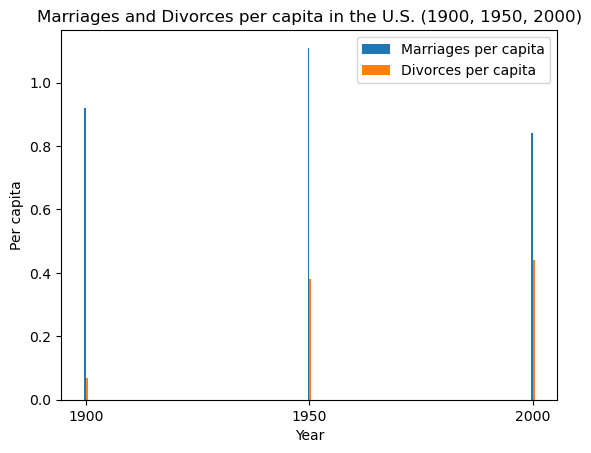

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# create a dataframe with the data
data = {'year': [1900, 1950, 2000],
        'marriages_per_capita': [0.92, 1.11, 0.84],
        'divorces_per_capita': [0.07, 0.38, 0.44]}
df = pd.DataFrame(data)

# create a vertical bar chart
plt.bar(df['year']-0.2, df['marriages_per_capita'], width=0.4, label='Marriages per capita')
plt.bar(df['year']+0.2, df['divorces_per_capita'], width=0.4, label='Divorces per capita')

# add labels and title
plt.xlabel('Year')
plt.ylabel('Per capita')
plt.title('Marriages and Divorces per capita in the U.S. (1900, 1950, 2000)')
plt.xticks(df['year'], df['year'])

# add legend
plt.legend()

# show the plot
plt.show()


# Question 8

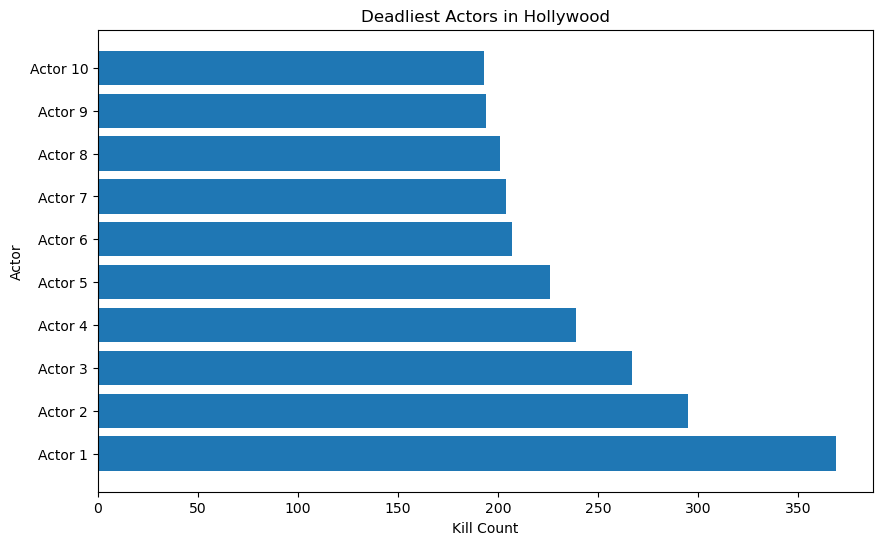

In [78]:
import matplotlib.pyplot as plt

# Define the data
actors = ['Actor 1', 'Actor 2', 'Actor 3', 'Actor 4', 'Actor 5', 'Actor 6', 'Actor 7', 'Actor 8', 'Actor 9', 'Actor 10']
kill_counts = [369, 295, 267, 239, 226, 207, 204, 201, 194, 193]

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(actors, kill_counts)

# Set the x-axis label
ax.set_xlabel('Kill Count')

# Set the y-axis label
ax.set_ylabel('Actor')

# Set the chart title
ax.set_title('Deadliest Actors in Hollywood')

# Show the plot
plt.show()


# Question 9

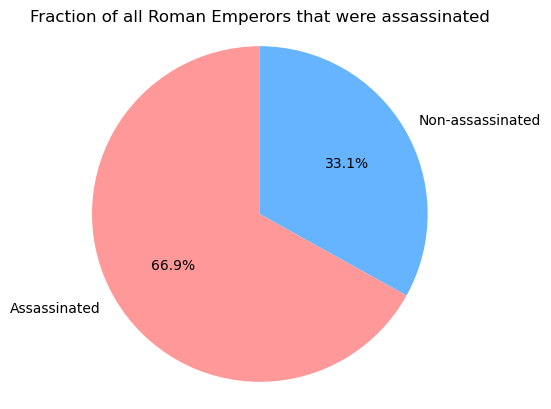

In [60]:
import matplotlib.pyplot as plt

# define data
assassinated = 83
non_assassinated = 41
total = assassinated + non_assassinated

# define labels and sizes
labels = ['Assassinated', 'Non-assassinated']
sizes = [assassinated/total, non_assassinated/total]

# define colors
colors = ['#ff9999','#66b3ff']

# create pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

# add title
plt.title('Fraction of all Roman Emperors that were assassinated')

# show plot
plt.show()


# Question 10

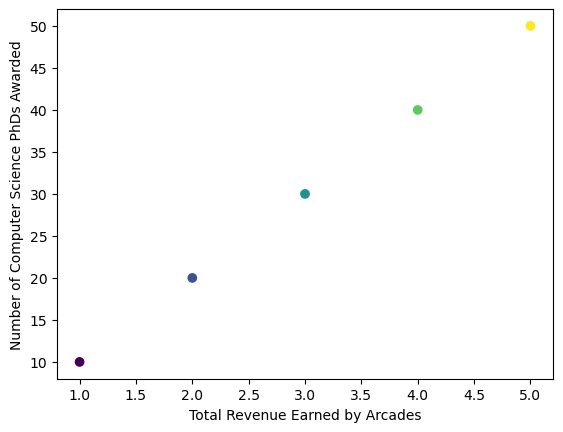

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
x = [1, 2, 3, 4, 5]
y = [10, 20, 30, 40, 50]
year = [2000, 2001, 2002, 2003, 2004]

# Create the scatter plot
plt.scatter(x, y, c=year, cmap='viridis')
plt.xlabel('Total Revenue Earned by Arcades')
plt.ylabel('Number of Computer Science PhDs Awarded')
plt.show()


